# Classification(creativity)
   In this example ,we will know how to use KNN/SVM to classify the dataset. 
   
   We will use the dataset which is added a new feature about the personal viewpoint.
   
    

In [1]:
#import models
%matplotlib inline
import numpy as np               #import numpy for cal
import pandas as pd              #import pandas for read file
import matplotlib.pyplot as plt  #import matplotlib to show some graph 

In [2]:
car_data = pd.read_csv('car_data_creativity.txt',sep = ",",encoding = 'utf-8')    #read file


In [3]:
car_data#show

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class_values,persional_point
0,0,1,1,2,2,1,2,unacc,0.0
1,1,1,1,2,2,1,3,unacc,0.0
2,2,1,1,2,2,2,1,unacc,0.0
3,3,1,1,2,2,2,2,unacc,0.0
4,4,1,1,2,2,2,3,unacc,0.0
5,5,1,1,2,2,3,1,unacc,0.0
6,6,1,1,2,2,3,2,unacc,0.0
7,7,1,1,2,2,3,3,unacc,0.0
8,8,1,1,2,4,1,1,unacc,0.0
9,9,1,1,2,4,1,2,unacc,0.0


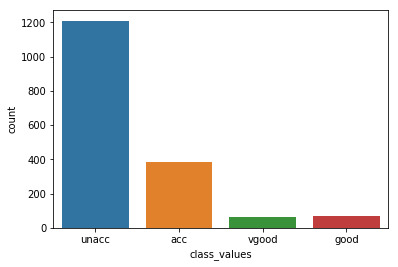

In [4]:
import seaborn as sns #import seaborn to plot
sns.countplot(car_data['class_values'],label="Count")  #use seaborn to plot the Bar plot
plt.show() #plot


In [5]:
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','persional_point'] #set the feature_names
X = car_data[feature_names]                                                   #set X in feature_names
y = car_data['class_values']                                                  #set y for the class_values

In [6]:
from sklearn.model_selection import train_test_split                       #import sklean to train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #set training/testing parts

In [7]:
from sklearn.preprocessing import MinMaxScaler  #to preprocess

scaler = MinMaxScaler()                         #scale
X_train = scaler.fit_transform(X_train)         #scale X_train


# KNN


In [8]:
from sklearn.neighbors import KNeighborsClassifier  #to use KNN

knn = KNeighborsClassifier()                        #use the Classifier
knn.fit(X_train, y_train)                           #input the data


print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train))) #show the result
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))       #show the result

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.05


In [9]:
from sklearn.metrics import classification_report   #import classification_report
from sklearn.metrics import confusion_matrix        #to use the confusion_matrix
pred = knn.predict(X_test)                          #cal the predict result after knn
print(confusion_matrix(y_test, pred))               #show the confusion mat 
print(classification_report(y_test, pred))          #show the detail Accuracy that we can learn from the explanation above

[[  0   2   0  94]
 [  0   0   0  18]
 [  0  19   0 279]
 [  0   0   0  20]]
             precision    recall  f1-score   support

        acc       0.00      0.00      0.00        96
       good       0.00      0.00      0.00        18
      unacc       0.00      0.00      0.00       298
      vgood       0.05      1.00      0.09        20

avg / total       0.00      0.05      0.00       432



C:\Users\MEC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    tick_marks = np.arange(4)
    aa=['acc','good','unacc','vgood']
    plt.xticks(tick_marks, aa, rotation=45)
    plt.yticks(tick_marks, aa)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



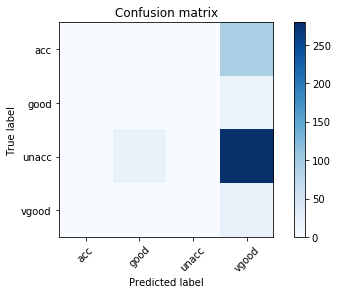

In [11]:
plt.figure()                                         #plot
plot_confusion_matrix(confusion_matrix(y_test, pred))#plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

# SVM

In [12]:
from sklearn.svm import SVC  #import to use svm
 
svc = SVC()                  #to use svc
svc.fit(X_train, y_train)    #input the data

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))  #show the result
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))        #show the result

Accuracy on training set: 0.89
Accuracy on test set: 0.68


In [13]:
from sklearn.preprocessing import MinMaxScaler #for preprocessing

scaler = MinMaxScaler() #scaler
X_train_scaled = scaler.fit_transform(X_train) #scale X_train
X_test_scaled = scaler.fit_transform(X_test)   #scale X_test

svc = SVC()                         #to use svc
svc.fit(X_train_scaled, y_train)    #input the data

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))  #show the result
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))        #show the result

Accuracy on training set: 0.89
Accuracy on test set: 0.87


In [14]:
svc = SVC(C=1000) #tune the 'c' value
svc.fit(X_train_scaled, y_train)#input the data

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))#show the result
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))      #show the result

Accuracy on training set: 0.995
Accuracy on test set: 0.977


In [15]:
#show the final tresult of two different methods 
#
print('HW2 creativity dataset')

#show training part
print('----------------------------------------------------------------------------------')
print('Accuracy on training set')
print('KNN         : {:.3f}'.format(knn.score(X_train, y_train)))
print('SVM(C=1000) : {:.3f}'.format(svc.score(X_train, y_train)))

#show testing part
print('----------------------------------------------------------------------------------')
print('Accuracy on test set')
print('KNN         : {:.3f}'.format(knn.score(X_test, y_test)))
print('SVM(C=1000) : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

HW2 creativity dataset
----------------------------------------------------------------------------------
Accuracy on training set
KNN         : 0.978
SVM(C=1000) : 0.995
----------------------------------------------------------------------------------
Accuracy on test set
KNN         : 0.046
SVM(C=1000) : 0.977


In [ ]:
|